## Building Word2vec Model from Scratch 

### Basic Idea:
<br> 1.Getting a corpus of data for training the model.
<br>2.Identifying the unique words along the corpus data.
<br>3.To capture the realtionship among the words 
<br>use nlp techniques either 
<br>CBOW or Skip-Gram
<br>4.Generating the contexts for each unique words
<br>5.Building a basic tf embedding model
 <br>Architecture
<br>create a embedding for each target(unique) word.
<br>the averaging them into single vector
<br>calculating loss
<br>and optimizing the weights of model through calculating the gradients
<br>6.fitting & estimating the embedding for words....

### Data

In [23]:
data = []
with open("train_corpus.txt",'r') as file:
    for sentence in file:
        data.append(sentence.strip())

In [24]:
data[:5]

['cat chases mouse',
 'cat catches mouse',
 'cat eats mouse',
 'mouse runs into hole',
 'cat says bad words']

In [25]:
# !pip install  tensorflow

In [26]:
from nltk.corpus import stopwords
import tensorflow as tf

In [27]:
unique_words = set()
corpus = []
for sentence in data:
    list_of_words = sentence.replace('.','').replace(',','').split()
    filtered = [i.lower() for i in list_of_words if i not in stopwords.words('english')]
    for x in filtered:
        unique_words.add(x)
    corpus.append(filtered)

In [28]:
len(unique_words),len(corpus)

(18, 14)

In [29]:
#function for id to word & word to id
dict_words = {(i+1):word for i,word in enumerate(unique_words)}
def id2word(x):
    return dict_words[x]
def word2id(x):
    for id,word in dict_words.items():
        if word==x:
            return id

In [30]:
id2word(2),word2id('late')

('runs', None)

In [31]:
### CBOW
def cbow(word,sentence,win_size=4):
    contexts = []
    if word in sentence:
            # print(word)
            prev = sentence[max(0,sentence.index(word)-win_size+1):sentence.index(word)]
            nxt = sentence[sentence.index(word)+1:min(len(sentence),sentence.index(word)+win_size+1)]
            k=prev+nxt
            for i in k:
                    contexts.append(word2id(i))
                    # print(contexts)
            
    if len(contexts)<8:
        contexts.extend(0 for i in range(8-len(contexts)))
        # print(contexts)
    
    return contexts
            
            

In [32]:
X = []
y = []
for sentences in corpus :
    for word in sentences:
            t = cbow(word,sentences)
            if len(t)==8:
                X.append(t)
                y.append(word2id(word))


In [33]:
len(y)

45

In [34]:
#converting data-list to tensorarrays
len(X)

45

In [35]:
X_tf = tf.constant(X)

y_tf = tf.constant(y)
y_tf.shape,X_tf.shape

(TensorShape([45]), TensorShape([45, 8]))

In [36]:
#modelling
#embedding int(input)
#pooling
#output
input_dim = len(unique_words)+1
embed_dim = 2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=input_dim,output_dim=embed_dim,name='embeddings'))
#input_dim is no of vocab_words since we are finding embeddings for that unique worsds
#here the each word is a dim , the data are in feature(column wise) and cbow are in rowwise
#output(embed) dim refers to the no of embeddings to computed(estimaated) for each vocab words
#we additionally specify the window_size for each that is input_length=8 (cbow=prev+next)
model.add(tf.keras.layers.GlobalAveragePooling1D())
#after embeddings we are pooling down into a single vector of size of vocab words
#it did by averaging along the last dimension i.e taking mean for every words' embed [x,x] 
model.add(tf.keras.layers.Dense(units=input_dim,activation='softmax'))
#finally it maps every computed embedding with vocab words by estimating the probs.. 
#backpropagates it to reduce the loss by finding the more optimised weights & biases to compute embeddings (should explain the word more closer).

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [41]:
model.fit(X_tf,y_tf,epochs=100,batch_size=10)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3482 
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 2.4282  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2332 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4907 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3034 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 2.2696
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5069 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3434 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3536 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4213 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3295 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2611 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3920 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4770 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3055 
Epoch 16/100
5/5 ━

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embeddings (Embedding)               │ (None, 8, 2)                │              38 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 2)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │              57 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287 (1.12 KB)

 Trainable params: 95 (380.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 192 (772.00 B)

In [43]:
model.get_layer('embeddings')(tf.constant(4)).numpy().tolist()

[1.3872357606887817, 1.2467352151870728]

In [44]:
word_embed = {}
for word in unique_words:
    word_embed[word] = model.get_layer('embeddings')(tf.constant(word2id(word))).numpy().tolist()

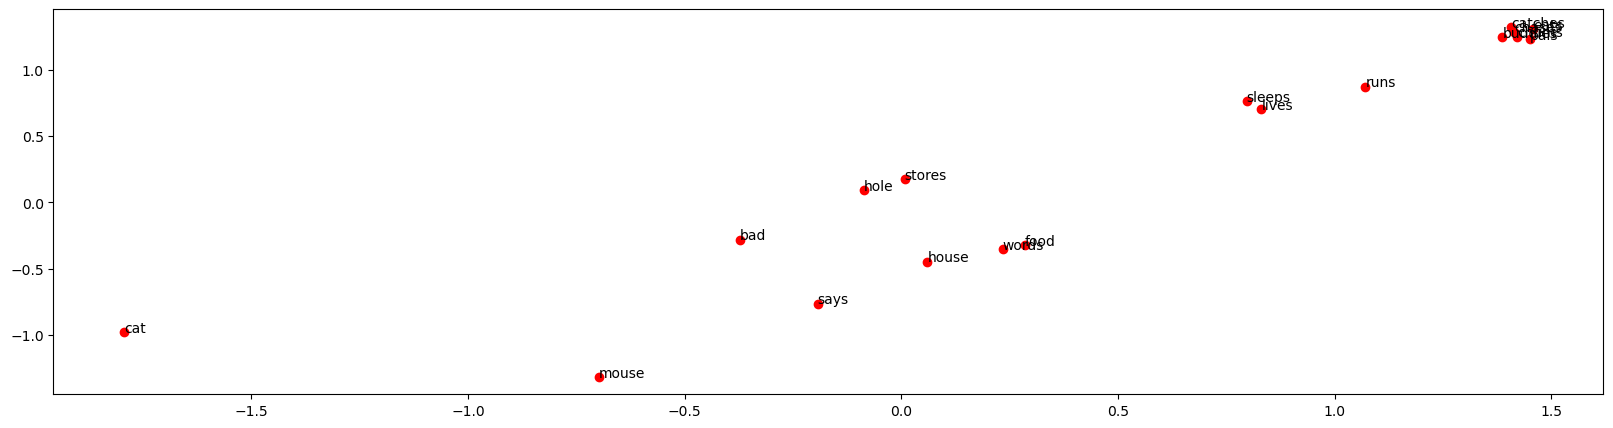

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
x_line = []
y_line = []

for em in word_embed.values():
    x_line.append(em[0])
    y_line.append(em[1])
  

plt.scatter(x_line,y_line,c='r')
for name,xy in word_embed.items():
    plt.annotate(name,xy)

Here some visualizations really makes sense ,this was just a example 100 sentence of corpus and lots of pretrained embedding models(billions of words) are also available....

# Thank You !.. ❤️                                                                    

In [21]:
#Abubacker S